In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
import pylab 
from scipy import stats
from sklearn.covariance import EllipticEnvelope

In [390]:
food = pd.read_csv("food_cleaned.csv")
food_cleaned = pd.read_csv("food_cleaned.csv")
food_cleaned.loc[~food_cleaned["state"].isin(["California", "New York"]), "state"] = "Underdeveloped"
companies = food["company"]
date = food["date"]
food["month"] = food["month"].astype("str")
food["year"] = food["year"].astype("str")
food["size"] = food["size"].astype("str")
food = food.drop(["Unnamed: 0", "Id", "date", "id", "company", "number", "street", "city", 'zip', 'lat', 'lon', 'pickup', 'planned', "day"], axis = 1)
food.loc[~food["state"].isin(["California", "New York"]), "state"] = "Underdeveloped"
food = pd.get_dummies(food)
food["company"] = companies
food["date"] = date

In [391]:
#food.to_csv("food_outliers.csv", sep = ",")

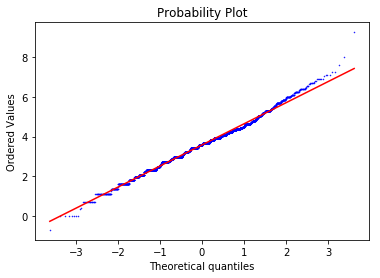

In [392]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log(food["pounds"])
res = stats.probplot(x, plot = plt)
ax.get_lines()[0].set_markersize(0.5)

pylab.show()

In [393]:
#identified using internal studentized residuals in R 
outliers = np.array([3312, 3631, 4006, 479, 4254, 3377, 912, 3281, 4361, 4303, 1936,
                     946, 927, 1615, 2836, 2457, 2498, 3235, 3354, 3147, 4279, 3353,
                     864, 1729, 1861, 2690, 2313, 1604, 3378, 1038, 837, 3759]) - 1
food[food.index.isin(outliers)]

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_comm,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date
478,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,ZeroCater,2017-08-08
836,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,MeUndies HQ,2017-09-06
863,1.4,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Twitch,2017-09-11
911,2.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Twitch,2017-09-14
926,800.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,ZeroCater,2017-09-13
945,3.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,ZeroCater,2017-09-15
1037,0.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Scribd,2017-09-22
1603,2000.0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,Twitter NYC,2017-11-03
1614,5.0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,The Town Kitchen,2017-11-02
1728,1.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,CircleCI,2017-11-13


In [394]:
food[~food.index.isin(outliers)]["pounds"].sort_values(ascending = False)

4166    1200.0
4169    1200.0
4691    1000.0
4575    1000.0
4622    1000.0
4105    1000.0
4465    1000.0
4610     900.0
4496     900.0
1383     850.0
4445     800.0
4207     800.0
4125     800.0
4151     800.0
4723     800.0
4595     750.0
4518     700.0
4082     700.0
4381     700.0
4640     700.0
2969     669.0
3501     620.0
3596     620.0
4335     600.0
3937     600.0
774      600.0
4413     600.0
4232     600.0
4063     600.0
3372     600.0
         ...  
2948       3.0
4356       3.0
3082       3.0
2776       3.0
3104       3.0
3221       3.0
2696       3.0
2676       3.0
3281       3.0
3338       3.0
1334       3.0
2578       3.0
710        3.0
3564       3.0
791        3.0
2508       3.0
784        3.0
2480       3.0
4571       3.0
2380       2.0
1504       2.0
3004       2.0
4705       2.0
298        2.0
3073       2.0
704        2.0
2377       2.0
2337       2.0
4619       2.0
2305       1.0
Name: pounds, Length: 4721, dtype: float64

\begin{align*}
&- \text{Running t-test with bonferroni correction on internally studentized residuals in R identified 32 outliers.}\\
&- \text{Outliers mostly datapoints that have pounds that are very high and very low.} \\
&- \text{Identified some reasonable donations such as 5 or 6 pounds as outliers.}\\ 
& \text{Didn't mark some really large donations such as 1200 pounds as an outlier nor other small donations that's 1 or 2 pounds}\\
\end{align*}

## Elliptical Envelope

In [395]:
X = np.array(food.drop(["company", "date"], axis = 1))
outlier_frac = 0.01

In [396]:
ell = EllipticEnvelope(contamination = outlier_frac, random_state = 12687)
ell.fit(X)

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.01,
         random_state=12687, store_precision=True, support_fraction=None)

In [397]:
y = ell.predict(X)
food["ell_outliers"] = y 
food_cleaned["ell_outliers"] = y

In [398]:
food[food["ell_outliers"] == -1]

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date,ell_outliers
774,600.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,Zesty SF,2017-09-01,-1
926,800.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,ZeroCater,2017-09-13,-1
1383,850.0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,The Town Kitchen,2017-10-19,-1
1603,2000.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Twitter NYC,2017-11-03,-1
1845,20.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Imgur,2017-11-18,-1
2055,600.0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,Zesty SF,2017-12-06,-1
2504,600.0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,EAT Club,2018-01-16,-1
2544,100.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,Curiodysse,2018-01-20,-1
2969,669.0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,Zesty SF,2018-02-16,-1
3311,776.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,Habit.com,2018-03-08,-1


## Isolation Forest

In [399]:
isf = IsolationForest(random_state = 123568, contamination = outlier_frac, n_estimators = 100)
isf.fit(X)
y = isf.predict(X)

In [400]:
food["isf_outliers"] = y
food_cleaned["isf_outliers"] = y

In [401]:
food[(food["isf_outliers"] == -1)]

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date,ell_outliers,isf_outliers
32,28.04,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Rubicon Project NYC,2017-06-23,1,-1
52,40.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Ellevate Network,2017-06-26,1,-1
53,60.00,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Zillow NYC,2017-06-26,1,-1
54,24.48,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Rubicon Project NYC,2017-06-26,1,-1
79,43.15,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,Demos,2017-06-28,1,-1
152,60.13,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,Dropbox,2017-07-07,1,-1
520,113.67,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Shutterstock,2017-08-10,1,-1
631,27.51,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,Dropbox,2017-08-21,1,-1
1173,60.00,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,Dropbox,2017-10-02,1,-1
1267,32.00,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,Dropbox,2017-10-09,1,-1


In [402]:
food[food["ell_outliers"] == 1]

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date,ell_outliers,isf_outliers
0,40.00,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,DoorDash,2017-06-21,1,1
1,3.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,GoFundMe,2017-06-21,1,1
2,100.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Twitch,2017-06-21,1,1
3,85.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Twitch,2017-06-21,1,1
4,50.00,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Opendoor,2017-06-21,1,1
5,20.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Braze SF Office,2017-06-21,1,1
6,35.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,Lever,2017-06-21,1,1
7,30.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,GoFundMe,2017-06-22,1,1
8,50.00,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Opendoor,2017-06-22,1,1
9,5.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Twitch,2017-06-22,1,1


In [403]:
food_cleaned[food_cleaned["ell_outliers"] == 1].drop(["ell_outliers", "isf_outliers"], axis = 1).to_csv("no_ell_outliers", sep = ",")

In [404]:
food_cleaned[food_cleaned["isf_outliers"] == 1].drop(["ell_outliers", "isf_outliers"], axis = 1).to_csv("no_isf_outliers", sep = ",")
food_cleaned[(food_cleaned["ell_outliers"]==1) & (food_cleaned["isf_outliers"] == 1)].drop(["ell_outliers", "isf_outliers"], axis = 1).to_csv("no_outliers", sep = ",")